<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering 
<br/>
<br/>
<br/>
Benyamin Maleki
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Reinforcment Learning Practical Assignment (50 + 10 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this notebook you will use the [openai gym](https://www.gymlibrary.dev/) library to train agents in two different reinforcment learning environments. the first environment is a very simple grid-world with discrete states. The second environment however, has continous states.  
make sure to upload your model performance video alongside this notebook. We suggest running this notebook on google colab so that you wont face any package errors.

we will first install the necessary packages.

In [1]:
!pip install gym==0.26
!pip install imageio imageio_ffmpeg
!pip install pygame
!pip install pyglet==1.5.1 
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 710 kB 23.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.26.0-py3-none-any.whl size=826297 sha256=ae1aa29ee0f015b1ac5bba00c5d5e19e8f92369f57698287e8625bdb141ee166
  Stored in directory: /root/.cache/pip/wheels/f1/f2/92/63d51de23bd3ef89d87af5663ef0a1b04781ccb9757b6f98d4
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21

the functions below will be used to make a video of the model performance. It will start the environment and choose the best action based on the given Qtable.

In [2]:
from IPython.display import HTML
from base64 import b64encode
import imageio

## comment this part if your not using google colab
from pyvirtualdisplay import Display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()
######################

def record_video_frozen_lake_env(env, Qtable, out_directory, fps=1, random_action=False):
  images = []  
  done = False
  state, info = env.reset(seed=random.randint(0,500))
  img = env.render()
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.random.randint(4)  if random_action else np.argmax(Qtable[state][:])
    state, reward, done, truncated, info = env.step(action)
    img = env.render()
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

def show_video(video_path, video_width = 600):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

## Part I: FrozenLake Environment (35 + 10 Points)

In [3]:
import numpy as np
import gym
import random
from tqdm.notebook import tqdm

In this exercise, we want to solve the FrozenLake environment. It is a simple grid-world environment where we have to reach a goal state while avoiding holes.  
You can read more about this environment [here](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)

**[Question 1 (1 Points)]**  
Create a <u>slippery</u> FrozenLake environment of size <u>4x4</u>


In [4]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True, render_mode='rgb_array')

Let's run a random policy in this environement to get a better understanding of it.

In [5]:
record_video_frozen_lake_env(env, None, 'frozenlake_random.mp4', fps=1, random_action=True)
show_video('frozenlake_random.mp4', video_width = 600)

**[Question 2 (1 Points)]**  
Briefly describe the state space, action space, and reward function of this environment.

**Answer:**  
Each state in this environment is a cell in the 𝑛x𝑛 grid. These states can be of type: Start, Frozen (regular type), Goal (winning and final state), or Hole (another type of final state which we should try to avoid).   \\
Actions include: DOWN, LEFT, UP, and RIGHT; which will take us from one state to another. \\
Reward function only grants us points when we reach a Goal State. Otherwise (in regular Frozen States and also Hole States), it returns 0.  


**[Question 3 (2 Points)]**  
Complete the code for `initialize_q_table` function. It should create a Q-table of size (state_space, action_space) and initializes it. You are free to use whichever initialization you want (a good starting point is to initialize it with all zeros)

In [6]:
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space.n, action_space.n))
  return Qtable

In [7]:
Qtable = initialize_q_table(env.observation_space, env.action_space)
actions = ['L', 'D', 'R', 'U']
print("Qtable:\nActions (in order of index in Qtable): L, D, R, U\nStates (which s is (row * n) + col): s = 0, 1, 2, ..., n*n - 1")
print(Qtable)

Qtable:
Actions (in order of index in Qtable): L, D, R, U
States (which s is (row * n) + col): s = 0, 1, 2, ..., n*n - 1
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


**[Question 4 (2 Points)]**  
Complete the code for `epsilon_greedy_policy` function. It should select the best action according to the current Q-function with probability $1-\varepsilon$ and select a random action with probability $\varepsilon$.

In [8]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  rand_num = random.random()
  if rand_num < epsilon: # random action selection
    action = env.action_space.sample()
  else:                  # greedy action selection
    action = np.argmax(Qtable[state])
  return action

**[Question 5 (4 Points)]**  
You need to choose appropriate hyperparameters for the agent to learn.

In particular, you must find a suitable learning rate and exploration parameters. To facilitate exploration, a common practice is to start with a high exploration rate ($\varepsilon$) and gradually decrease it as the agent gets better. To implement this, you need to specify the starting exploration rate (`max_epsilon`), the final exploration rate (`min_epsilon`) and a decay rate which reduces the exploration rate after each update (see the `train` function below).

In [9]:
import math
# Training parameters
n_training_episodes = 50_000  # Total training episodes
n_eval_episodes = 10_000
learning_rate = 0.5          # Learning rate

# Environment parameters
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0                                                        # Exploration probability at start
min_epsilon = 0.005                                               # Minimum exploration probability 

ro = 0.001   # a constant to indicate the level of proximity of epsilon to min_epsilon
theta = 0.5  # percentage of episodes after which, epsilon = min_epsilon * (1+ro)
decay_rate = -(1 / (theta * n_training_episodes)) * math.log(ro * min_epsilon / (max_epsilon-min_epsilon))          # Exponential decay rate for exploration prob
### Explanation and example for how decoy_rate works:
### decoy_rate here is a function of (min_epsilon, max_epsilon, ro, theta)
### if min_epsilon = 0.005, max_epsilon = 1, theta = 0.5 and ro = 0.001, then
### after termination of 50% of episodes, our epsilon will reach 0.05 * (1 + 0.001) which
### conceptually means "an epsilon really near to the min_epsilon".

**[Question 6 (10 Points)]**  
Complete the `train` function which updates `Qtable` using the Q-learning update rule.

In [10]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in tqdm(range(n_training_episodes)):
    # Adjust epsilon
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state, info = env.reset()
    step = 0
    done = False

    # repeat
    for step in range(max_steps):
      # You must:
      # Take action A_t and observe R_{t+1}, S_{t+1}
      action = epsilon_greedy_policy(Qtable, state, epsilon)
      new_state, reward, done, info, prob = env.step(action)

      # Update the Qtable with (S_t, A_t, R_{t+1}, S_{t+1})
      diff = reward + gamma * np.max(Qtable[new_state]) - Qtable[state, action]
      Qtable[state, action] = Qtable[state, action] + learning_rate * diff

      # Be careful about episode termination and truncation
      if done:
        break   # end episode
        # truncation handled by max_steps in for loop condition
      
      # Update state to new state
      state = new_state

  return Qtable

We are now ready to train our agent.

In [19]:
Qtable_trained = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable)

  0%|          | 0/50000 [00:00<?, ?it/s]

Now, we will evaluate our agent. You don't need to write any code, just run the following cells as they are.

In [20]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param Q: The Q-table
  """
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):
    state, info = env.reset()
    step = 0
    terminated = False
    total_rewards_ep = 0
    
    for step in range(max_steps):
      action = np.argmax(Q[state][:])
      new_state, reward, terminated, truncated, info = env.step(action)
      total_rewards_ep += reward
        
      if terminated:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [21]:
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_trained)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}") # should be around 0.65

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean_reward=0.73 +/- 0.44


Now let's see how well our model is doing.

In [22]:
record_video_frozen_lake_env(env, Qtable_trained, 'frozenlake_trained.mp4', fps=1)
show_video('frozenlake_trained.mp4', video_width = 600)

Next, we will take a look at the Q-function that was learned.

In [23]:
print(Qtable_trained)

[[1.65935209e-01 9.45977364e-02 5.99331255e-02 1.49451793e-01]
 [1.87909022e-02 3.84203141e-03 6.52712555e-03 1.48948223e-01]
 [2.98807686e-02 4.61729432e-02 4.00118105e-02 8.26026588e-02]
 [8.25716253e-03 2.19805014e-02 2.01227296e-02 7.97356134e-02]
 [2.26347388e-01 8.49380713e-02 8.47883852e-02 1.15117440e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16532815e-03 3.39238735e-03 3.69209595e-02 4.68670487e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.19718270e-02 5.50683811e-02 1.64968918e-01 2.71873693e-01]
 [9.18172817e-02 2.75220831e-01 5.27331662e-02 8.21142588e-02]
 [1.71260972e-01 2.43294379e-02 3.30387046e-02 4.44237857e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.11911271e-01 1.06071714e-01 6.19489131e-01 2.53207539e-01]
 [3.11588435e-01 9.34956517e-01 5.15928234e-01 3.38799271e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

**[Question 7 (5 Points)]**  
Assume that `Qtable_trained` is the correct Q-function for the final epsilon-greedy policy that was used in training. What is the value function that corresponds to this policy? Write down the relation between $V_\pi$ and $Q_\pi$ and use it to complete the following code block.

**Answer:**
$$V_\pi (s) = \max_a Q_\pi(s,a)$$

In [24]:
Vtable_trained = np.array([np.max(Qtable[state]) for state in range(env.observation_space.n)])

Take a look at the value function

In [25]:
print(Vtable_trained.reshape(4, 4))

[[0.16593521 0.14894822 0.08260266 0.07973561]
 [0.22634739 0.         0.03692096 0.        ]
 [0.27187369 0.27522083 0.17126097 0.        ]
 [0.         0.61948913 0.93495652 0.        ]]


**[Question 8 (5 Points)]**  
Write a function to generate a visualization for the value function using a heatmap. In a few words, explain what you see.

In [26]:
import matplotlib.pyplot as plt

def label_cell(i, j, text):
  plt.text(i, j, text, horizontalalignment='center', verticalalignment='center')

def visualize(Vtable):
  fig, ax = plt.subplots()
  im = ax.imshow(Vtable.reshape(4,4), cmap = "YlGn")
  # Removing axes labels
  plt.xticks([])
  plt.yticks([])
  # Create colorbar
  cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
  cbar.ax.get_yaxis().labelpad = 15
  cbar.ax.set_ylabel('Value function', rotation=270)
  # Labeling some of cells 
  label_cell(0, 0, 'Start')
  label_cell(1, 1, 'Hole')
  label_cell(0, 3, 'Hole')
  label_cell(3, 1, 'Hole')
  label_cell(3, 2, 'Hole')
  label_cell(3, 3, 'Goal')

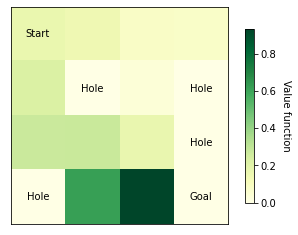

In [27]:
visualize(Vtable_trained)

**[Question 9 (5 Points)]**  
Can we use a pure greedy policy for Q-learning? Explain.

**Answer:**

If we use pure greedy policy, it will be the same as 𝛆-greedy with 𝛆 being zero. This means that we are going to have no exploration and it means the learning will not happen properly (becuse initially we set all of Q-values to zero and exploitation here does not make any sense. At first, we need to act randomly to find out the real values corresponding to the environment).

**[Bonus Question (10 Points)]**  
Think about the role of the discount factor in this environment and experiment.  
1. Explain why it is not the best idea to set $\gamma = 1$ for a navigation task. You might find it easier to reason about a deterministic (i.e., non-slippery) environment. (5 Points)
2. If we had used $\gamma = 1$, the value of states could be interpreted in a meaningful way. Think about what $V^*(s)$ would be if we had set $\gamma = 1$ and trained until we got the optimal value function. (5 Points)

**Answer:**

1. γ determines how much the future rewards are valuable to our agent. if γ is near 0 it means that the agent tends to care more about immediate rewards (which are more likely to be achieved) than the farther ones. However, if we increase γ towards 1, we are more and more caring and relying on future rewards (somehow the agent is optimistically considering the future rewards as available as immediate rewards). So, if we set γ=1 then it thinks that any future reward has the same value as (and somehow is as achievable as) the immediate ones. \\
2. The intuition I have tells me that as the effect of later rewards is the same as immediates, so all of the non-terminal states are going to have the same V-functin value. This is because of the fact that any two non-terminal state may reach each othe with a sequence of actions, and from then on, the rewards of them is going to be identical.

# Part II: Mountain Car Environment (15 point)

The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill.

lets create the environment.

In [28]:
env = gym.make("MountainCar-v0", render_mode='rgb_array')

The state of the car is represented by its velocity and position along the x axis. the velocity is a number between -0.07, 0.07 and the position is a number between -1.3, 0.6. There are 3 discrete deterministic actions: (0:Accelerate to the left, 1:Don’t accelerate, 2:Accelerate to the right)
The starting position of the car is different each time we run the environment.

In order to use the same Q learning algorithm on this environment we need to somehow discretize the states. We can easily do this by dividing the range of the observation into smaller range.   
its important how small we divide these range. if the step size is too big we might not achieve a good accuracy and if the step size is too small we will have a bigger observation space.  

**[Question 10 (5 Points)]**  
implement the next  discretization function.

In [29]:
def discretize(x, min_value, step_size):
    return int((x - min_value) // step_size)

assert(discretize(0.222, 0.1, 0.1)==1)
assert(discretize(0.134, 0.1, 0.1)==0) 

we will use step size 0.1 for the position and the step size 0.01 for the velocity. the following function will discretize a state using the function you implemented above.

In [30]:
def discretize_state(state, step_velocity=0.01, step_position=0.1):
  position, velocity = state
  position = discretize(position, -1.3, step_position)
  velocity = discretize(velocity, -0.07, step_velocity)
  if position==19:
    position = 18
  if velocity==14:
    velocity = 13
  return (position, velocity)

the function below will run the mountain car experiment and output a video. We will use it to run an agent with a random policy.

In [31]:
def record_video_mountain_car_env(env, Qtable, out_directory, fps=1, random_action=False, max_episode=500):
  images = []  
  truncated, done = False, False
  state, info = env.reset(seed=random.randint(0,500))
  state = discretize_state(state)
  img = env.render()
  images.append(img)
  episode = 0
  while episode < max_episode and not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.random.randint(3)  if random_action else np.argmax(Qtable[state[0]][state[1]][:])
    state, reward, done, truncated, info = env.step(action)
    state = discretize_state(state)
    img = env.render()
    images.append(img)
    episode += 1
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

def show_video(video_path, video_width = 600):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

record_video_mountain_car_env(env, None, 'mountaincar_random.mp4', fps=15, random_action=True)
show_video('mountaincar_random.mp4', video_width = 600)

**[Question 11 (2 Points)]**  
Implement the next functions like you did the previous part. 

In [32]:
def initialize_q_table(step_size_velocity, step_size_pos, action_space):
  # Qtable should be of the shape (discrete position value, discrete velocity value, action_no)
  count_steps_position, count_steps_velocity = discretize_state((env.max_position, env.max_speed), step_size_velocity, step_size_pos)
  Qtable = np.zeros((count_steps_position + 1, count_steps_velocity + 1, action_space))
  return Qtable

def epsilon_greedy_policy(Qtable, state, epsilon):
  rand_num = random.random()
  if rand_num < epsilon: # random action selection
    action = env.action_space.sample()
  else:                  # greedy action selection
    action = np.argmax(Qtable[state[0], state[1]])
  return action

Qtable = initialize_q_table(0.01, 0.1, 3)
# first dim: desc position
# second dim: desc velocity
# third dim: actions


**[Question 12 (8 Points)]**  
Change the previous train function so it works in this environment.

In [33]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in tqdm(range(n_training_episodes)):
    # Adjust epsilon
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state, info = env.reset()
    step = 0
    done = False

    # repeat
    for step in range(max_steps):
      # Take action 'a' then observe the reward and new state
      position, velocity = discretize_state(state)
      action = epsilon_greedy_policy(Qtable, (position, velocity), epsilon)
      new_state, reward, done, info1, info2 = env.step(action)
      new_position, new_velocity = discretize_state(new_state)
      
      # Update the Qtable
      diff = reward + gamma * np.max(Qtable[new_position, new_velocity]) - Qtable[position, velocity, action]
      Qtable[position, velocity, action] = Qtable[position, velocity, action] + learning_rate * diff

      # Episode termination and truncation
      if done:
        break   # end episode
      # truncation handled by max_steps in for loop condition
      
      # Update state to new state
      state = new_state

  return Qtable

Now lets train our model. You can change the hyperparameters if you want.

In [34]:
# Training parameters
n_training_episodes = 20_000  # Total training episodes
learning_rate = 0.1           # Learning rate

# Environment parameters
max_steps = 200               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 2e-3            # Exponential decay rate for exploration prob

In [35]:
Qtable_trained = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable)

  0%|          | 0/20000 [00:00<?, ?it/s]

Now let us inspect how well our model is doing. In order to pass the assignment, the car must reach the goal.

In [37]:
record_video_mountain_car_env(env, Qtable_trained, 'mountaincar_random.mp4', fps=15)
show_video('mountaincar_random.mp4', video_width = 600)